# Introduction

> Citation dans La géométrie du monde végétal

Les mathémtiques confèrent aux humains une capacité d'abstraction suffisamment complexe pour leur permettre de toucher les étoiles et les atomes, d'assembler la pensée pour mieux apprécier l'histoire et de prédire le futur, de toucher l'infini et de goûter à l'éternité. Les avancés des outils de calcul permettent de projeter des images de l'univers, bien au-delà de la Voie lactée. Appréhender le vivant par demeure néanmoins une tâche complexe.

En développant son jeu de la vie (*game of life*) en 1970, John Horton Connway a présenté un exemple percutant que des règles simples peuvent mener à des résultats innatendus. Le jeu consiste à placer des jetons sur les cases d'un plateau de jeu consistant en une simple grille othogonale. Le jeu évolue en fonction du nombre de jetons présents parmi les huit cases du voisinage des jetons ou des cases vides.

1. Les jetons ayant 0 ou 1 voisin sont retirés.
2. Les jetons ayant 2 ou 3 voisins restent intacts
3. Les jetons ayant plus de 3 voisins sont retirés
4. Un jeton est posé sur les cases ayant exactement 3 voisins 

C'est tout. Selon la manière dont les jetons sont placés au départ, il se peut que la grille se vide de ses jetons, ou que les jetons y prennent beaucoup de place. Il arrive aussi que des cycles réguliers se dégagent ou que l'on se retrouve avec des formes régulières. Vous aurez peut-être compris à ce stade pourquoi le jeu est appelé "jeu de la vie". La première règle est une situation localisée de sous-population, condition dans laquelle la reproduction est difficile. La deuxième règle est une situation localisée statble. La troisième est une situation de surpopulation, où des individus meurent par un environnement rendu inadéquat par insuffisance de ressource ou surplus de toxicité. Enfin, la quatrième indique une situation favorable à la reproduction.

Une grille vidée correspond à une extinction et une grille remplie correspond à une explosion de population. Une oscillation est un "climax", un état stable en écologie. Un léger changement initial dans la disposition initiale des jetons peu mener à des solutions différentes.

Le jeu, qui en fait est une application de la technique des *automates cellulaires*, se complexifie à mesure que le nombre de jetons grandit. Un humain passera des heures à calculer une ittération à 50 jetons, commettra probablement quelques erreurs et demandera quelques cafés. Un processeur pourra gérer des centaines d'ittérations sur des grilles de centaines de jetons en quelques secondes.

Dans un [billet de blogue](https://jakevdp.github.io/blog/2013/08/07/conways-game-of-life/) destiné au jeu de la vie Jake VanderPlas a développé les codes nécessaires pour jouer au jeu de la vie. Le langage utilisé est Python. Vous n'êtes pas tenus à comprendre le code: il s'agit seulement de vous laisser impressionner par l'écologie mathématique et les capacités offertes par les ordinateurs.

In [7]:
import numpy as np
from JSAnimation.IPython_display import display_animation, anim_to_html
from matplotlib import animation
%pylab inline

def life_step(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

def life_animation(X, dpi=10, frames=10, interval=300, mode='loop'):
    X = np.asarray(X)
    assert X.ndim == 2
    X = X.astype(bool)
    
    X_blank = np.zeros_like(X)
    figsize = (X.shape[1] * 10. / dpi, X.shape[0] * 10. / dpi)

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap=plt.cm.binary, interpolation='nearest')
    im.set_clim(-0.05, 1)  # Make background gray

    # initialization function: plot the background of each frame
    def init():
        im.set_data(X_blank)
        return (im,)

    # animation function.  This is called sequentially
    def animate(i):
        im.set_data(animate.X)
        animate.X = life_step(animate.X)
        return (im,)
    animate.X = X

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=frames, interval=interval)
    
    #print anim_to_html(anim)
    return display_animation(anim, default_mode=mode)

Populating the interactive namespace from numpy and matplotlib



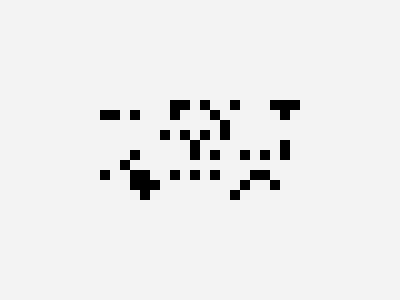
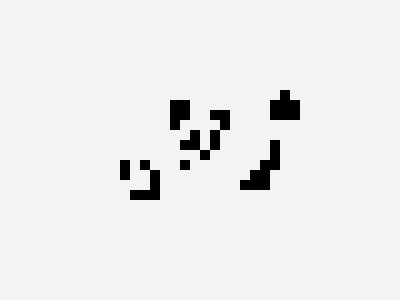
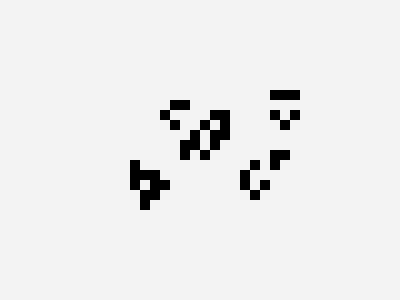
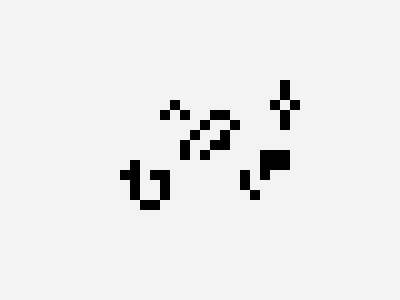
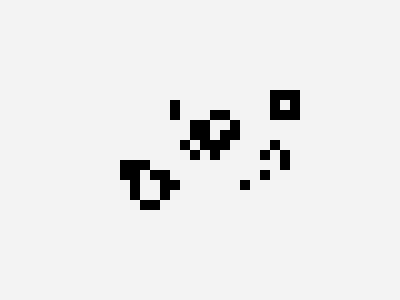
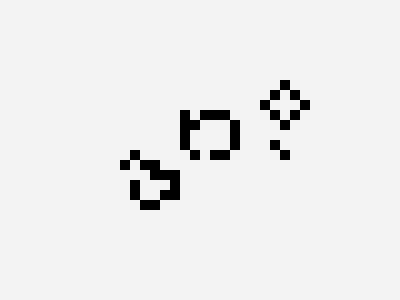
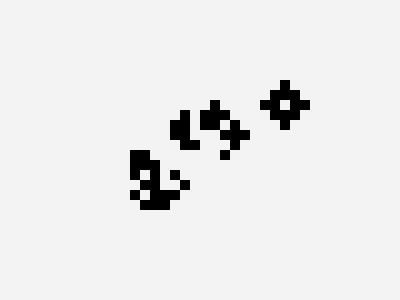
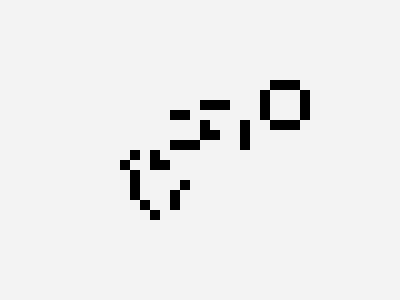
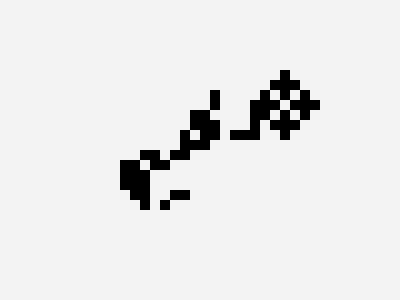
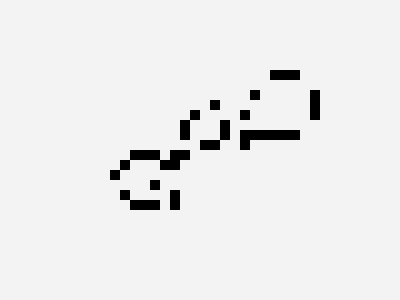
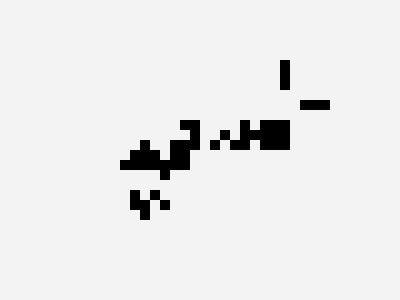
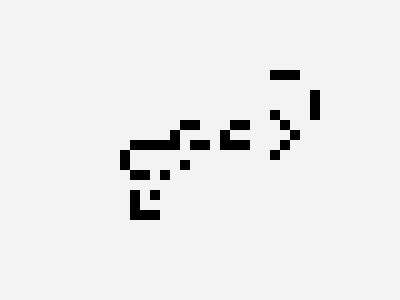
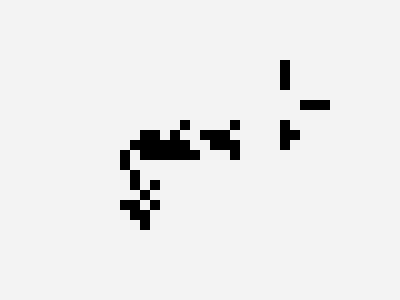
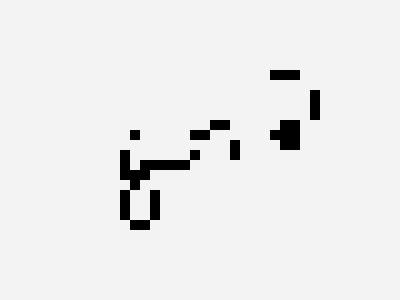
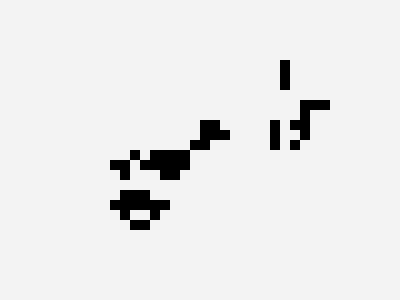
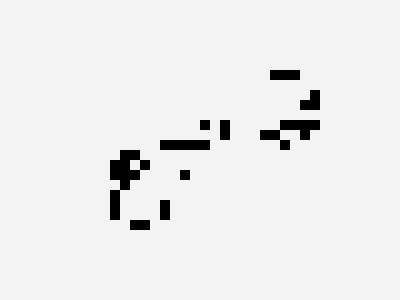
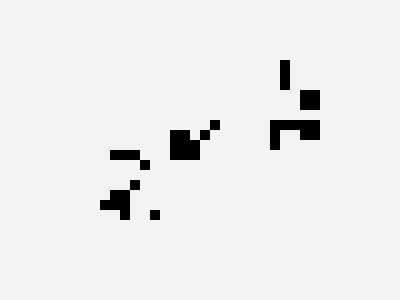
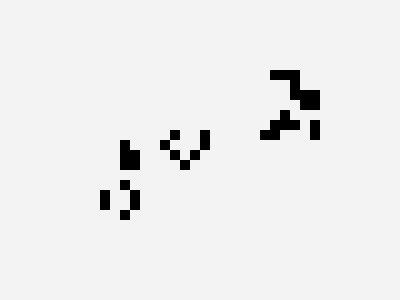
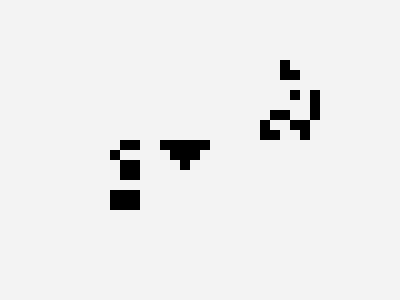
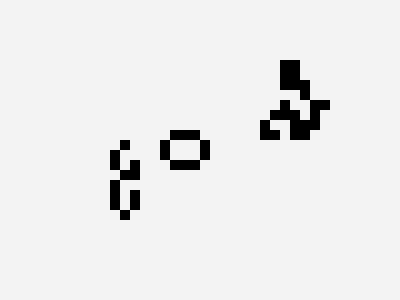
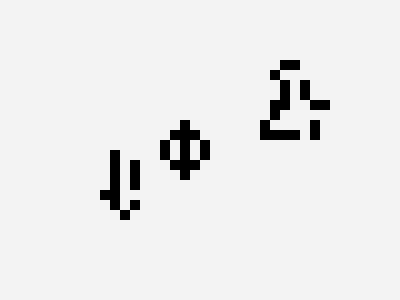
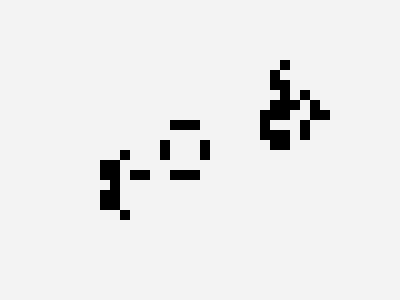
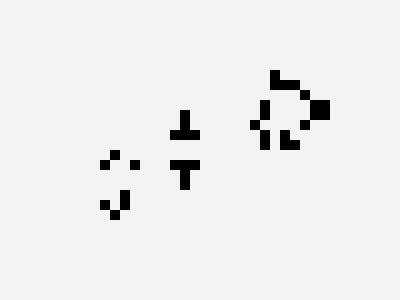
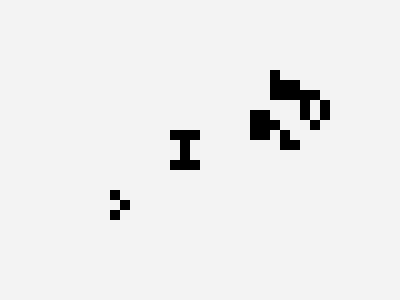
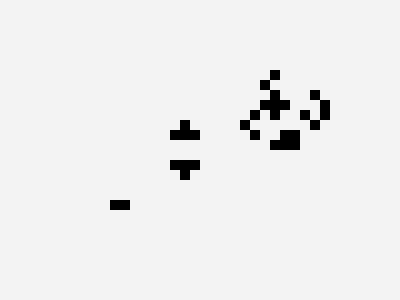
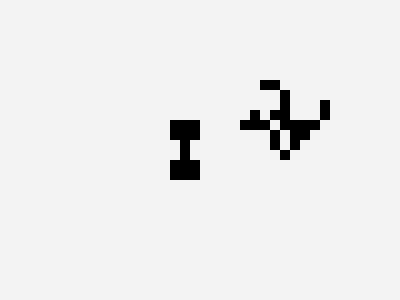
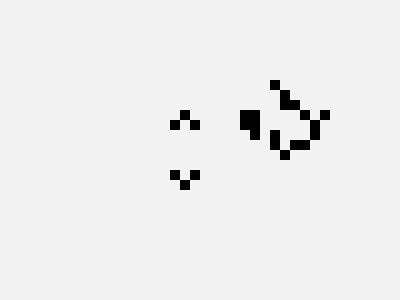
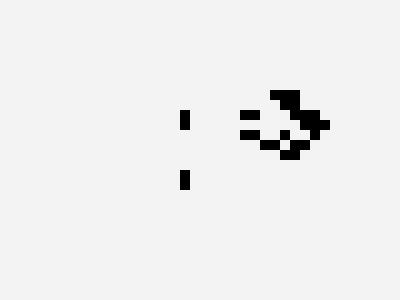
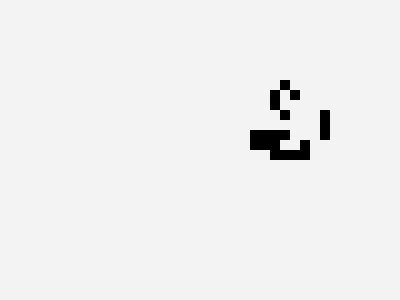
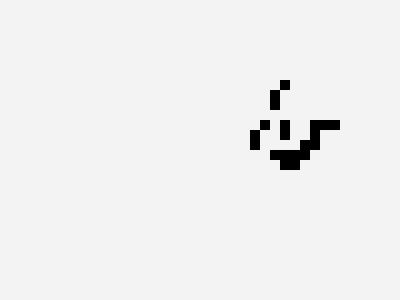
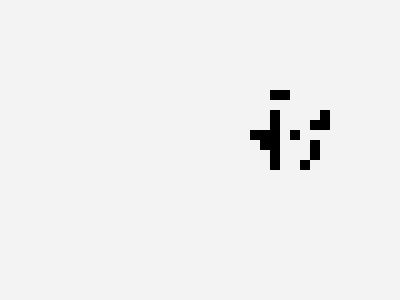
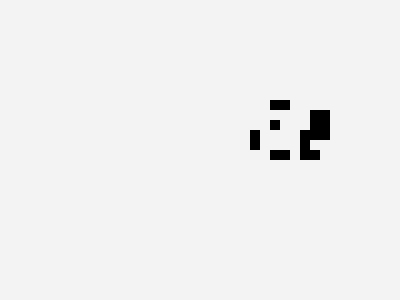
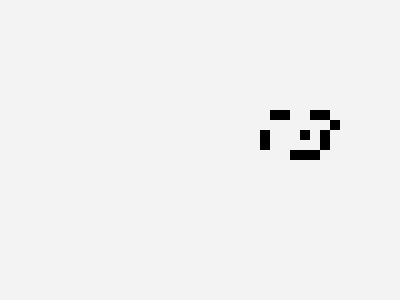
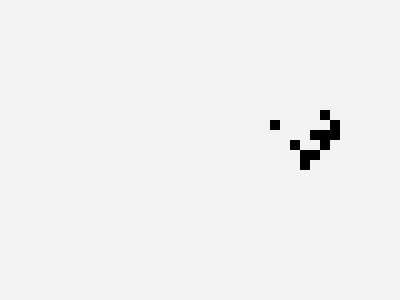
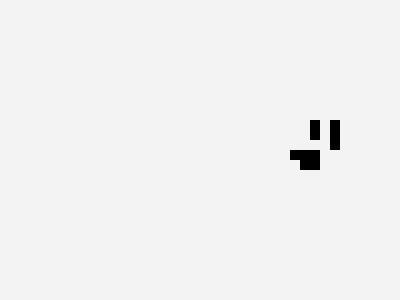
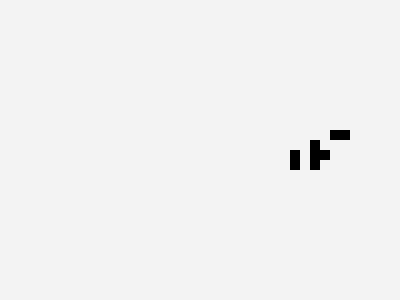
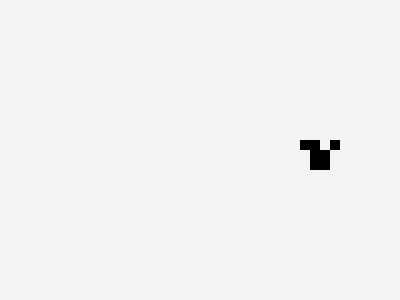
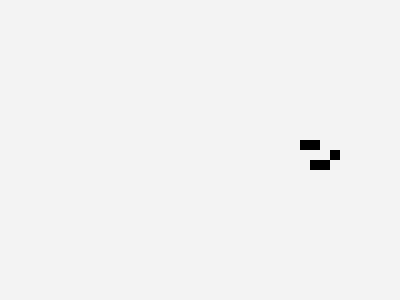
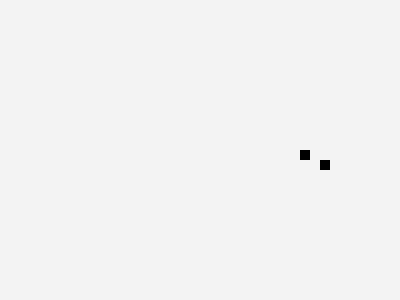
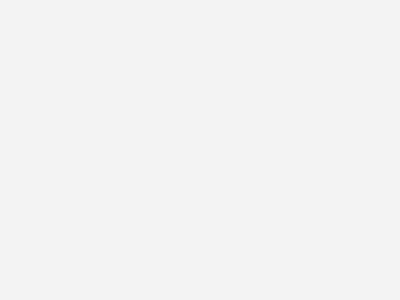

In [16]:
np.random.seed(0)
X = np.zeros((30, 40), dtype=bool)
r = np.random.random((10, 20))
X[10:20, 10:30] = (r > 0.75)
life_animation(X, dpi=10, frames=40, mode='once')

En établissant des règles correspondant aux mécanismes de l'objet étudié, il devient possible de modéliser l'évolution des systèmes vivants, comme l'émergence d'espèces invasives.

![](https://media.giphy.com/media/dkaEYYiCDclAA/giphy.gif?response_id=5925bb98f431280237d48493)
Source: Anynyme, publié sur [Giphy](https://giphy.com/gifs/misc-dkaEYYiCDclAA).

## Définitions

<img src="images/disciplines.png" width=300 align="left" style="padding:0 30px">

L'écologie mathématique couvre un large spectre de domaines, mais peut être divisée en deux branches: l'**écologie théorique** et l'**écoplogie quantitative** (Legendre et legendre, 2012). Alors que l'écologie théorique s'intéresse à l'expression mathématique des mécanismes écologiques, l'écologie quantitative, plus empirique, en étudie principalement les phénomènes. La modélisation écologique vise à prévoir une situation selon des conditions données. Faisant partie à la fois de l'écologie théorique et de l'écologie quantitative, elle superpose souvent des mécanismes de l'écologie théorique aux phénomènes empiriques de l'écologie quantitative. L'**écologie numérique** comprend la branche descriptive de l'écologie quantitative, c'est-à-dire qu'elle s'intéresse à évaluer des effets à partir de données empiriques. L'exploration des données dans le but d'y découvrir des structures passe souvent par des techniques multivariées comme la classification hiérarchique ou la réduction d'axe (par exemple, l'analyse en composantes principales), qui sont davantage heuristiques que statistiques. Les tests d'hypothèses et l'analyse des probabilités, quand à eut, relèvent de la biostatistique.

Le **génie écologique**, une dicipline intimement liée à l'écologie mathématique, est vouée à l'analyse, la modélisation, la conception et la construction de systèmes vivants dans le but de résoudre de manière efficace des problèmes liés à l'écologie et une panoplie de domaines qui lui sont raccordés. L'agriculture est l'un de ces domaines. C'est d'emblée la discipline qui sera prisée dans ce manuel. Néanmoins, les principes qui seront discutés sont transférable à l'écologie générale comme à la foresterie.

Comme cours de calcul scientifique, les sujets de l'analyse et de la modélisation seront couverts.

## À qui s'adresse ce manuel?

Ce manuel est distribué librement (license [MIT](LIEN)) créé dans un environnement intéractif de type *carnet de notes* ([Jupyter lab](https://jupyter.org), [nteract](https://nteract.io)). Ce format permet aussi de travailler avec le langage de programmation Python, qui sera ici l'outil privilégié pour le calcul scientifique.

Le cours vise à introduire des étudiants gradués en agronomie, biologie, écologie, sols, génie agroenvironnemental, génie civil et génie écologique au calcul scientifique dans leur domaine, tant pour les appuyer pour leurs travaux de recherche que pour leur fournir une trousse d'outil émancipatrice pour leur cheminement professionnel. Plus spécifiquement, vous serez accompagné à découvrir différents outils numériques qui vous permettront d'appréhender vos données, d'en faire émerger l'information et de construire des modèles phénoménologques et mécanistiques.

Bien que des connaissances en programmation et en statistiques aideront grandement les étudiant⦁e⦁s à appréhender ce document, une littéracie informatique n'est pas requise. Dans tous les cas, quiconque voudra tirer profit de ce manuel devra faire preuve d'autonomie. Vous serez guidés vers des ressources et des références, mais je vous suggère vivement de développer votre propre bibliothèque adaptée à vos besoins et à votre manière de comprendre.

## Les logiciels libres

Vous noterez que tous les outils numériques qui sont proposés dans ce cours sont des logiciels libres:

> « Logiciel libre » [free software] désigne des logiciels qui respectent la liberté des utilisateurs. En gros, cela veut dire que les utilisateurs ont la liberté d'exécuter, copier, distribuer, étudier, modifier et améliorer ces logiciels. Ainsi, « logiciel libre » fait référence à la liberté, pas au prix1 (pour comprendre ce concept, vous devez penser à « liberté d'expression », pas à « entrée libre »). - [Projet GNU](https://www.gnu.org/philosophy/free-sw.fr.html)

Donc: codes sources ouverts, développement souvent communautaire, gratuité. Plusieurs [raisons éthiques](https://www.youtube.com/watch?v=Ag1AKIl_2GM), principalement liées au contrôle de l'environnement virtuel par les utilisateurs et les communautés, peuvent justifier l'utilisation de logiciels libres. Plusieurs raisons pratiques justifient aussi cette orientation. Les logiciels libres vous permettent de transporter vos outils avec vous, d'une entreprise à l'autre, au bureau, ou à la maison, et ce, sans vous soucier d'acheter de coûteuses licences.

On soulève avec justesse les risques liés aux erreurs de calculs. Pour les scientifiques, une erreur peu mener à une étude retirée de la littérature et potentiellement des politiques publiques mal avisées. Pour les ingénieurs, les conséquences pourraient être dramatiques. **Comme professionnel.le, cous êtes responsabile des outils que vous utilisez: vous devez vous assurer de la bonne qualité d'un logiciel, qu'il soit propriétaire ou communautaire**. Alors que la qualité des logiciels propriétaires est généralement suivie par audits, celle des logiciels libres est plutôt soumise à la vigilance communautaire. Chaque approche a ses avantages et inconvénients, mais elles ne sont pas exclusives. Ainsi les logiciels libres peuvent être audités à l'externe par quiconque décide de le faire. Différentes entreprises, souvent concurantes, participent tant à cette vigilance qu'au développement des logiciels libres: elles en sont même souvent les instigatrices.

## Pourquoi Python?

En plus d'être libre, Python est un langage de programmation dynamique et générique apprécié pour sa polyvalence et sa simplicité. Son développement est supporté par la [Python Software Foundation](https://www.python.org/psf/). Python est utilisé autant pour créer des logiciels ou des sites web que pour le calcul scientifique. Ainsi, Python peut être utilisé en interopérabilité avec une panoplie de logiciels libres, comme [QGIS](http://www.qgis.org) pour la cartorgaphie et [FreeCAD](https://github.com/FreeCAD/FreeCAD) pour le dessin technique. Mais par dessus tout, une fois implémenté avec des modules de calcul scientifique (que nous couvrirons au long du cours), Python devient un outil de calcul convivial, rapide et fiable pour le calcul écologique.

![](https://imgs.xkcd.com/comics/python.png)
Source: [xkcd](https://xkcd.com/353/)

## Pourquoi pas R?
Des comparaisons peuvent inévitablement être dressées avec des langages offrant des possibilités similaires. En particulier, [R](https://www.r-project.org/) est un langage de programmation orienté pour le calcul statistique. Davantage que Python à ce jour, R comprend une quantité impressionnante de modules destinés à toutes sortes d'applications scientifiques. Il est prisé en biologie, en écologie et en agronomie pour sa simplicité et la grande qualité de ses modules. Sa popularité reste moindre pour effectuer des calculs numériques liés à l'ingénierie ou pour déployer des algorithmes sous forme de logiciel.

Bien que leurs possibilités se superposent largement, ce serait une erreur d'aborder R et Python comme des langages rivaux. Les deux sont similaire et s'inspirent mutuellement: apprendre à travailler avec l'un vient à apprendre l'autre. Par ailleurs, les spécialistes en calcul scientifique tendent à apprendre à travailler avec plus d'un langage de programmation.

D'autres languages realtivement similaires à Python, comme [Julia](http://julialang.org), [Scala](http://www.scala-lang.org) et [Ruby](http://sciruby.com), sont aussi utilisés en calcul scientifique. Des languages de plus bas niveau, comme Fortran et C++, viennent souvent appuyer les fonctions des autres langages: ces langages sont plus ardus à utiliser au jour le jour, mais leur rapidité de calcul est imbatable.

## Pourquoi pas Matlab?
Parce qu'on est en 2017.

## Comment lire ce manuel?

## Lectures complémentaires

### Écologie mathématique

- [How to be a quantitative ecologist](). Jason Mathipoulos vous prend par la main pour découvrir les notions de mathématiques fondamentales en écologie, appliquées avec le langage R.  
- [Numerical ecology](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0). L'ouvrage hautement détaillé des frères Legendre est non seulement fondamental, mais aussi fondateur d'une science qui évolue encore aujourd'hui: l'analyse des données écologiques.
- [A practical guide to ecological modelling](http://www.springer.com/us/book/9781402086236). Soetaert et Herman portent une attention particulière à la présentation des principes de modélisation dans un langage accessible - ce qui est rarement le cas dans le domaine de la modélisation. Les modèles présentés concernent principalement les bilans de masse, en terme de systèmes de réactions chimiques et de relations biologiques.
- [Modélisation mathématique en écologie](http://www.documentation.ird.fr/hor/fdi:010050350). Rare livre en modélisation écologique publié en français, la première partie s'attarde aux concepts mathématiques, alors que la deuxième planche à les appliquer. Si le haut niveau d'abstraction de la première partie vous rebute, n'hésitez pas débuter par la seconde partie et de vous référer à la première au besoin.
- [A new ecology: systems perspective](https://www.elsevier.com/books/a-new-ecology/jorgensen/978-0-444-53160-5). Principalement grâce au soleil, la Terre forme un ensemble de gradients d'énergie qui se déclinent en des systèmes d'une étonnante complexité. C'est ainsi que le regreté Sven Erik Jørgensenn (1934-2016) et ses collaborateurs décrivent les écosystèmes dans cet ouvrage qui fait suite aux travaux fondateurs de Howard Thomas Odum.
- Ecological engineering. Principle and Practice.
- Ecological processes handbook.
- Modeling complex ecological dynamics


### Programmation
- [Python for data analysis](http://shop.oreilly.com/product/0636920023784.do). 
- [Numerical ecology with R](http://www.springer.com/la/book/9781441979759). Daniel Borcard enseigne l'écologie numérique à l'Université de Montréal. Son cours est condensé dans ce livre recettes voué à l'application des principes lourdement décrits dans [Numerical ecology](https://www.elsevier.com/books/numerical-ecology/legendre/978-0-444-53868-0).
- [Soil physics with Python](https://global.oup.com/academic/product/soil-physics-with-python-9780199683093?cc=ca&lang=en&).
- Python geospatial development

### Divers
- [The truthful art](http://www.thefunctionalart.com/p/the-truthful-art-book.html). Cet ouvrage de Alberto Cairo s'intéresse à l'utilisation des données et de leurs présentation pour fournir une information adéquate à différents publics.

## Besoin d'aide?

Les ouvrages de référence reconnus vous offrent des bases solides sur lesquelles vous pouvez vous appuyer dans vos travaux. Mais au delà des principes, au jour le jour, vous vous butterez inmanquablement à toutes sortes de petits problèmes. Quel module utiliser pour cette tâche précise? Que veut dire ce message d'erreur? Comment interpréter ce résultat? Pour tous les petits accorcs du quotidien en calcul scientifique, internet offre de nombreuses ressources qui sont très hétérogènes en qualité. Vous aprendrez à reconnaître les ressources fiables à celles qui sont douteuses. Les plate formes basées sur Stack Exchange, comme [Stack Overflow](https://stackoverflow.com) et [Cross Validated](https://stats.stackexchange.com), m'ont souvent été d'une aide précieuse. Vous aurez avantage à vous contruire une petite banque d'information ([Framanotes](https://framanotes.org), Evernote, Google keep) en collectant des liens, en prenant en notes certaines recettes et en suivant des sites d'intérêt avec des flux RSS.

## Contribuer au manuel

## À propos de l'auteur

Je m'appelle Serge-Étienne Parent. Je suis ingénieur écologue et professeur adjoint au Département des sols et de génie agroalimentaire de l'Université Laval, Québec, Canada. Je crois que la science est le meilleur moyen d'appréhender le monde pour prendre des décisions avisées, particulièrement en écologie, une science maltraitée de toute part.

## À propos du cours

Ce cours a été développé pour ouvrir des perspectives mathématiques en écologie et en agronomie à la FSAA de l'Université Laval. Il est complémentaire à certains cours offerts dans d'autres institutions académiques au Québec, dont ceux-ci.

- [BIO2041. Biostatistiques 1](https://admission.umontreal.ca/cours-et-horaires/cours/bio-2041/), Université de Montréal
- [BIO2042. Biostatistiques 2](https://admission.umontreal.ca/cours-et-horaires/cours/BIO-2042/), Université de Montréal
- [BIO109. Introduction à la programmation scientifique](https://github.com/EcoNumUdS/BIO109), Université de Sherbrooke
- [BIO500. Méthodes en écologie computationnelle](https://github.com/EcoNumUdS/BIO500), Université de Sherbroke.

## Remerciements

## Références
Velten, 2009. Mathematical Modeling and simulation.